In [1]:
import pandas as pd
import numpy as np

# meth = pd.read_csv("data_methylation_hm450.txt", sep='\t')
# meth.head()

In [ ]:
# df = pd.read_csv("PDX_response_to_standard_therapy.csv")
# df['PDX_Line'] = ['Mayo-PDX-Sarkaria-'+str(val) for val in df['PDX_Line'].values]
# df.head()

In [23]:
mut = pd.read_csv('data_mutations.txt', sep='\t')
mut

C:\Users\mmarc\AppData\Local\Temp\ipykernel_22952\2991404808.py:1: DtypeWarning: Columns (4,38,39,43,51,58,82,86,91,92,94,103,104) have mixed types. Specify dtype option on import or set low_memory=False.
  mut = pd.read_csv('data_mutations.txt', sep='\t')


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,TSL,UNIPARC,User_HGVSc,User_HGVSp,User_HGVSp_Short,VARIANT_CLASS,all_effects,cDNA_position,n_depth,t_depth
0,TUBB8P11,388579,.,GRCh37,1,809654,809654,+,non_coding_transcript_exon_variant,RNA,...,NaN,NaN,NaN,NaN,NaN,SNV,"FAM41C,non_coding_transcript_exon_variant,,ENS...",-/504,NaN,NaN
1,TUBB8P11,388579,.,GRCh37,1,809681,809681,+,non_coding_transcript_exon_variant,RNA,...,NaN,NaN,NaN,NaN,NaN,SNV,"FAM41C,non_coding_transcript_exon_variant,,ENS...",-/504,NaN,NaN
2,TUBB8P11,388579,.,GRCh37,1,809687,809687,+,non_coding_transcript_exon_variant,RNA,...,NaN,NaN,NaN,NaN,NaN,SNV,"FAM41C,non_coding_transcript_exon_variant,,ENS...",-/504,NaN,NaN
3,SAMD11,148398,.,GRCh37,1,861480,861480,+,intron_variant,Intron,...,NaN,UPI0000D61E04,c.72+87N>A,NaN,NaN,SNV,"SAMD11,intron_variant,,ENST00000342066,NM_1524...",-/2551,NaN,NaN
4,AGRN,375790,.,GRCh37,1,985823,985823,+,stop_gained,Nonsense_Mutation,...,NaN,UPI00001D7C8B,c.4993N>T,p.Glu1665Ter,p.E1665*,SNV,"AGRN,stop_gained,p.Glu1665Ter,ENST00000379370,...",5043/7323,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193388,RLIM,51132,.,GRCh37,X,73802892,73802892,+,downstream_gene_variant,3'Flank,...,NaN,UPI000006FD6A,NaN,NaN,NaN,SNV,"RLIM,downstream_gene_variant,,ENST00000332687,...",-/8317,NaN,NaN
193389,RLIM,51132,.,GRCh37,X,73802912,73802912,+,downstream_gene_variant,3'Flank,...,NaN,UPI000006FD6A,NaN,NaN,NaN,SNV,"RLIM,downstream_gene_variant,,ENST00000332687,...",-/8317,NaN,NaN
193390,HCFC1,3054,.,GRCh37,X,153210179,153210180,+,downstream_gene_variant,3'Flank,...,NaN,UPI0000E5B00C,NaN,NaN,NaN,insertion,"RENBP,5_prime_UTR_variant,,ENST00000412763,;HC...",-/1388,NaN,NaN
193391,Unknown,0,.,GRCh37,Y,3713460,3713460,+,NaN,IGR,...,NaN,NaN,NaN,NaN,NaN,SNV,NaN,NaN,NaN,NaN


Get which samples were sequenced. The 'cases_sequenced.txt' comes from the experiemnt database same as mutation_data.txt

In [24]:
# Open the file and read the 6th line (line index 5)
with open("cases_sequenced.txt", "r") as f:
    lines = f.readlines()
    sample_line = lines[5]  # 6th line (index starts from 0)

# Extract the part after the ":" and split by tab
seq_samples = sample_line.split(":", 1)[1].strip().split("\t")

# Now `samples` is a list of sample IDs
print(seq_samples)


['Mayo-PDX-Sarkaria-182', 'Mayo-PDX-Sarkaria-181', 'Mayo-PDX-Sarkaria-229', 'Mayo-PDX-Sarkaria-8', 'Mayo-PDX-Sarkaria-9', 'Mayo-PDX-Sarkaria-184', 'Mayo-PDX-Sarkaria-5', 'Mayo-PDX-Sarkaria-6', 'Mayo-PDX-Sarkaria-228', 'Mayo-PDX-Sarkaria-3', 'Mayo-PDX-Sarkaria-108', 'Mayo-PDX-Sarkaria-102', 'Mayo-PDX-Sarkaria-80', 'Mayo-PDX-Sarkaria-85', 'Mayo-PDX-Sarkaria-84', 'Mayo-PDX-Sarkaria-195', 'Mayo-PDX-Sarkaria-196', 'Mayo-PDX-Sarkaria-192', 'Mayo-PDX-Sarkaria-215', 'Mayo-PDX-Sarkaria-218', 'Mayo-PDX-Sarkaria-280A', 'Mayo-PDX-Sarkaria-280B', 'Mayo-PDX-Sarkaria-75', 'Mayo-PDX-Sarkaria-76', 'Mayo-PDX-Sarkaria-200', 'Mayo-PDX-Sarkaria-201', 'Mayo-PDX-Sarkaria-206', 'Mayo-PDX-Sarkaria-209', 'Mayo-PDX-Sarkaria-114', 'Mayo-PDX-Sarkaria-115', 'Mayo-PDX-Sarkaria-116', 'Mayo-PDX-Sarkaria-117', 'Mayo-PDX-Sarkaria-110', 'Mayo-PDX-Sarkaria-69', 'Mayo-PDX-Sarkaria-67', 'Mayo-PDX-Sarkaria-66', 'Mayo-PDX-Sarkaria-64', 'Mayo-PDX-Sarkaria-118', 'Mayo-PDX-Sarkaria-61', 'Mayo-PDX-Sarkaria-279', 'Mayo-PDX-Sarkari

specify label = "RT_Ratio" or "TMZ_Ratio" or "RT_and_TMZ_Ratio"

In [25]:
label = 'TMZ_Ratio'

In [ ]:
list(mut.columns)

In [14]:
aa = list(mut["Hugo_Symbol"].unique())
tp53ish = []
for a in aa:
    if a[:4] == 'TP53':
        tp53ish.append(a)
        print(a)

TP53I11
TP53BP1
TP53
TP53I3
TP53INP2
TP53TG5
TP53INP1
TP53I13
TP53RK
TP53TG3D
TP53BP2
TP53AIP1


C:\Users\mmarc\AppData\Local\Temp\ipykernel_22952\541515609.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mmarc\AppData\Local\Temp\ipykernel_22952\541515609.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")


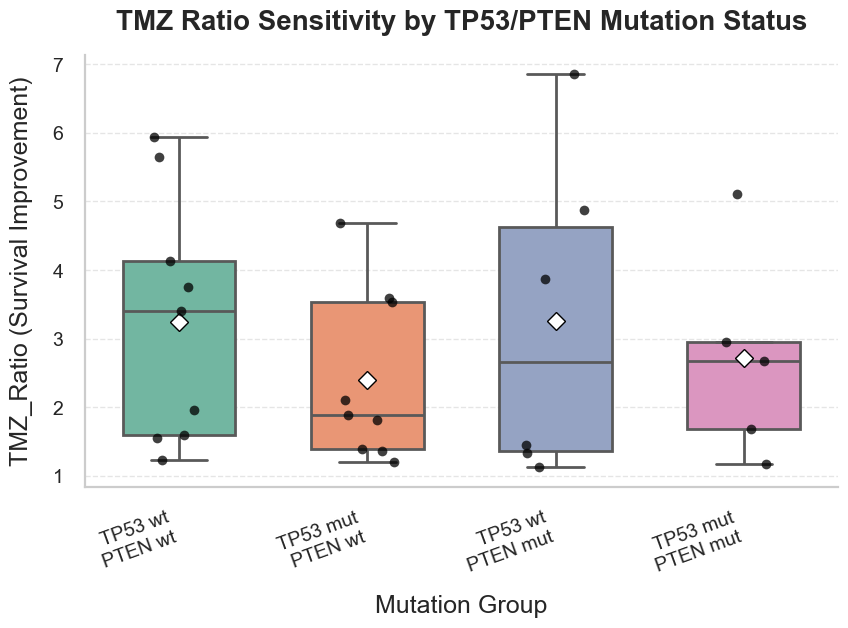

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Big, clean styling ---
sns.set_theme(style="whitegrid", context="poster")
plt.rcParams.update({
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "axes.titleweight": "bold",
    "axes.linewidth": 1.6,
})

# Pretty axis label from your y column name
pretty_y = label.replace("_", " ")

# Wrap x tick labels to avoid steep rotation
label_map = {
    "TP53 wt / PTEN wt": "TP53 wt\nPTEN wt",
    "TP53 mut / PTEN wt": "TP53 mut\nPTEN wt",
    "TP53 wt / PTEN mut": "TP53 wt\nPTEN mut",
    "TP53 mut / PTEN mut": "TP53 mut\nPTEN mut",
}
order = [
    "TP53 wt / PTEN wt",
    "TP53 mut / PTEN wt",
    "TP53 wt / PTEN mut",
    "TP53 mut / PTEN mut",
]
merged = merged.copy()
merged["Mutation_Group_Pretty"] = merged["Mutation_Group"].map(label_map).fillna(merged["Mutation_Group"])
order_pretty = [label_map.get(o, o) for o in order]

# --- Plot ---
fig, ax = plt.subplots(figsize=(9, 6))

sns.boxplot(
    data=merged, x="Mutation_Group_Pretty", y=label, order=order_pretty,
    palette="Set2", showfliers=False, width=0.6, linewidth=2,
    showmeans=True, meanprops={"marker": "D", "ms": 9, "mec": "black", "mfc": "white"},
    ax=ax
)
sns.stripplot(
    data=merged, x="Mutation_Group_Pretty", y=label, order=order_pretty,
    color="black", alpha=0.75, jitter=0.18, size=7, ax=ax
)

ax.grid(axis="y", linestyle="--", linewidth=1, alpha=0.5)
sns.despine(ax=ax, left=False, bottom=False)

ax.set_title(f"{pretty_y} Sensitivity by TP53/PTEN Mutation Status", pad=18)
ax.set_xlabel("Mutation Group", labelpad=14)
ax.set_ylabel(f"{label} (Survival Improvement)", labelpad=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

plt.tight_layout()
plt.subplots_adjust(top=0.90, bottom=0.18)

# Save publication-grade copies
plt.savefig("tp53_pten_boxplot.png", dpi=400, bbox_inches="tight")
plt.savefig("tp53_pten_boxplot.pdf", bbox_inches="tight")
plt.show()


In [12]:
aa = list(mut["Hugo_Symbol"].unique())
ptenish = []
for a in aa:
    if a[:4] == 'PTEN':
        ptenish.append(a)
        print(a)

PTEN
PTENP1
